자료 출처 
- 아동학대 통계자료 : 
    - https://kosis.kr/statHtml/statHtml.do?orgId=117&tblId=TX_117_2009_HJ004&vw_cd=MT_ZTITLE&list_id=117_11764_00A&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do  
- 아동학대범죄관련법 연혁 : 
    - https://www.law.go.kr/LSW/lsRvsRsnListP.do?lsId=011997&chrClsCd=010202&lsRvsGubun=all
    - https://www.law.go.kr/LSW/lsRvsRsnListP.do?lsId=000190&chrClsCd=010102

In [145]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

    
plt.style.use('ggplot')


In [56]:
def get_df_from_db(cur, sql, inputs= ''):
    if inputs == '':
        cur.execute(sql)
    else:
        cur.execute(sql.format(*inputs))
    df = cur.fetchall()
    df = pd.DataFrame(df, columns = [t[0] for t in cur.description])

    return df


In [171]:
def draw_plot_with_sql(cur, sql, inputs, row_df= '', show_text = True):
    df = get_df_from_db(cur, sql, inputs)
    df.set_index('시점', inplace = True)
    if '계' in df.columns[0]:
        cols = list(df.columns[1:])
    else:
        cols = list(df.columns)
    colors = sns.color_palette('hls', len(cols))
    plt.figure(figsize=(16,6))
    plt.xticks(range(len(df.index)), df.index, rotation=80)
    for col in cols[0:-1]:
        plt.plot(range(len(df.index)),df[col],
                 'o--', color = colors[cols.index(col)+1])
    plt.bar(range(len(df.index)), df.loc[:,cols[-1]], alpha = 0.5, color = colors[0])
    plt.legend(cols,loc = 2, fontsize = 16)
    plt.title(inputs[0])
    if len(row_df):
        for i in range(len(row_df.index)):
            try:
                xloc = [2001 +i for i in range(20)].index(row_df['시점'][i])
                yloc = max(df.loc[row_df['시점'][i], cols]) +100
                plt.axvline(x=xloc, ymin=0, ymax=1.0, color = 'black', alpha = 0.5)
                if show_text:
                    plt.text(x=xloc, y = yloc, s = row_df['short_dis'][i], fontsize = 14, color = 'r', ha = 'right' )
            except:
                pass
    plt.show()

In [122]:
def get_powerful_law(cur):
    sql = """
select * from {}
where short_dis like '%{}%' or
    short_dis like '%{}%' or
    short_dis like '%{}%'
order by 시점 ;
"""
    df = get_df_from_db(cur, sql, ['law_history', '전부', '전문', '제정'])
    return df

In [123]:
def get_law_detail_include(cur, include_str):
    sql = """
select * from {}
where detail like '%{}%'
order by 시점 ;
"""
    df = get_df_from_db(cur, sql, ['law_history', include_str])
    return df

In [195]:
def get_law_wordcloud(law_df):
    okt = Okt()
    details = law_df['detail']
    sentences_tag = []
    for detail in details:
        sentences_tag += okt.pos(detail)
    noun_adj_list = []
#     print(sentences_tag)
    for w, t in sentences_tag:
        if t in ['Noun']:
            if w not in ['등', '위', '및', '수', '그', '관', '함', '점', '대한', '실시', '아동복']:
                noun_adj_list.append(w)
    counts = Counter(noun_adj_list)
    tags = counts.most_common(40)
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    
    wc = WordCloud(font_path = path, background_color='white',
                   max_font_size=60)
    cloud = wc.generate_from_frequencies(dict(tags))

    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

table in DataBase : ['child_count', 'gaheja', 'law_history', 'types']


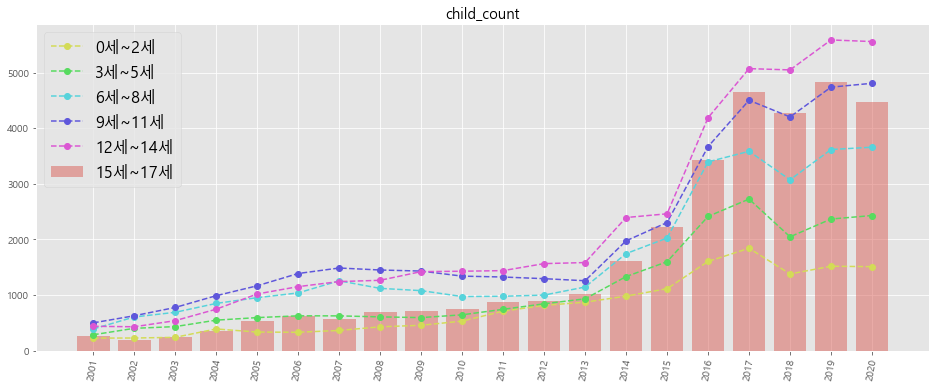

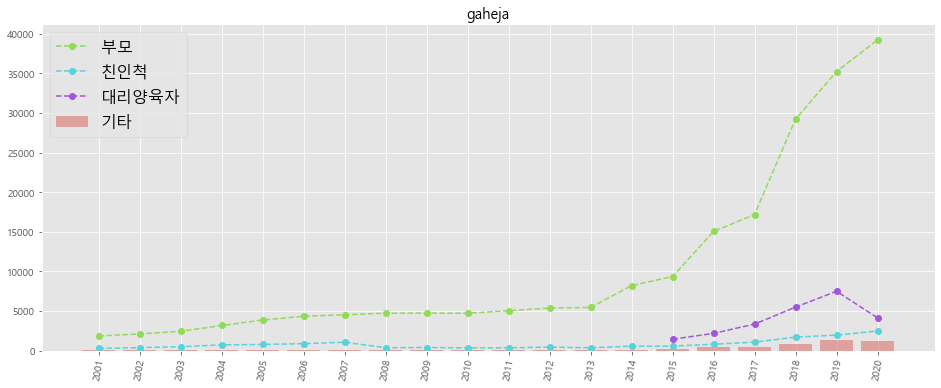

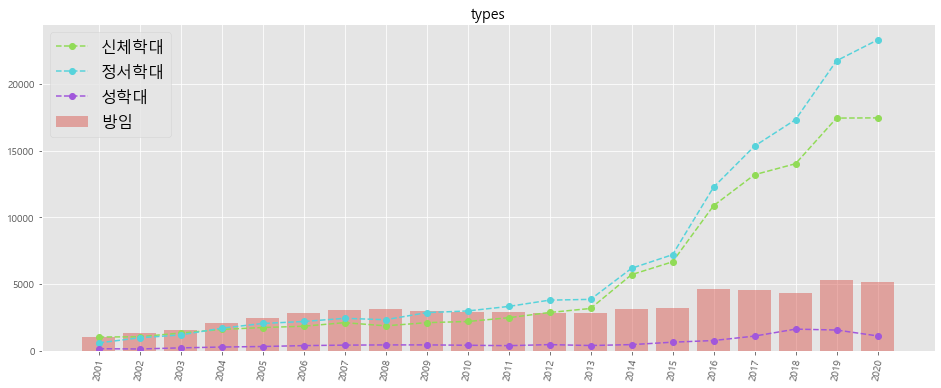

12~14세에 대한, 부모에 의한, 정신적 학대가 주를 이룬다.. 

2013년 관련 개정 내용 
 아동보호구역에 영상정보처리기기(CCTV)를 설치할 수 있도록 재량사항으로 규정하고 있어 예산부족 등을 이유로 영상정보처리기기가 설치가 원활히 이루어지고 있지 않은바, 모든 아동보호구역에 영상정보처리기기 설치를 의무화함으로써 아동이 안전하게 성장할 수 있는 환경을 조성하는 한편, 아동학대 신고의무자의 신고의무 위반 시 부과하는 과태료 상한을 현행 100만원에서 300만원으로 상향조정함으로써 학대아동에 대한 법적 보호와 구제의 실효성을 높이려는 것


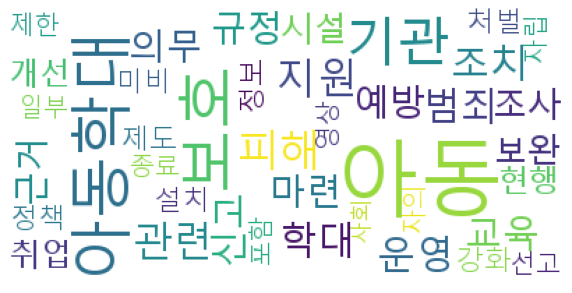

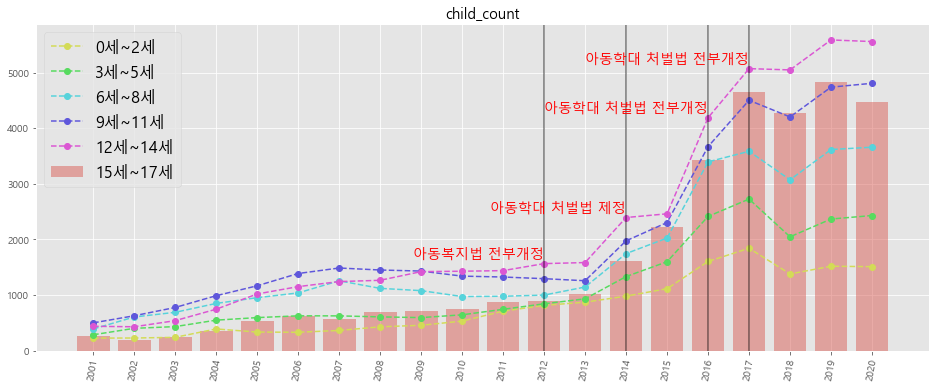

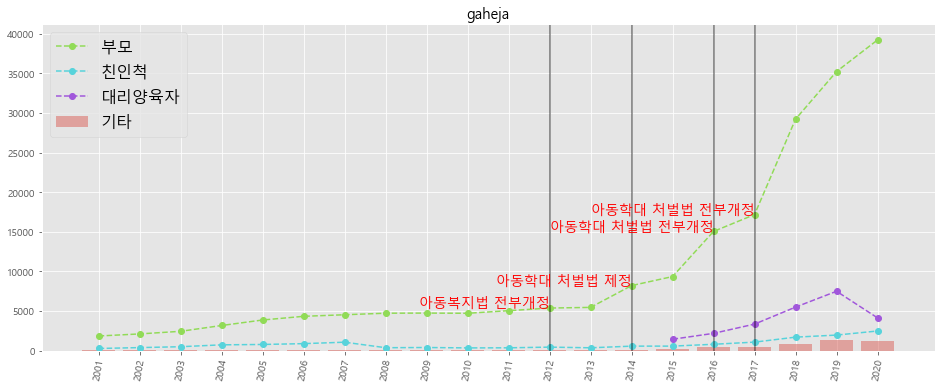

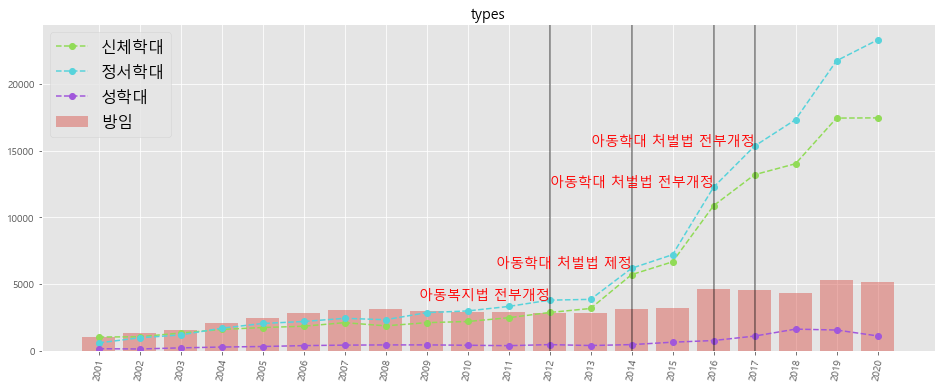

법률 초기 제정, 전문 개정 영향
:  아동학대 처벌법 제정, 개정 이후 아동학대 발생 수와 피해 아동 수가 증가한다. 이는 실제 범죄수의 증가로 생각 할 수도 있지만,  
   아동 인권보호에대한 인식 변화와 단속 강화를 통해 기존에 일어나고 있던 범죄행위에 대한 검거수가 높아진 것으로 생각 할 수도 있다.

처벌 관련 법 제/개정


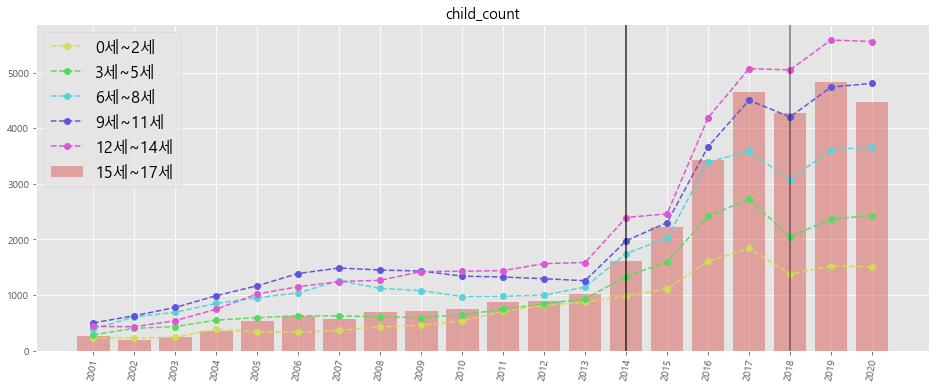

처벌 관련 법 제/개정


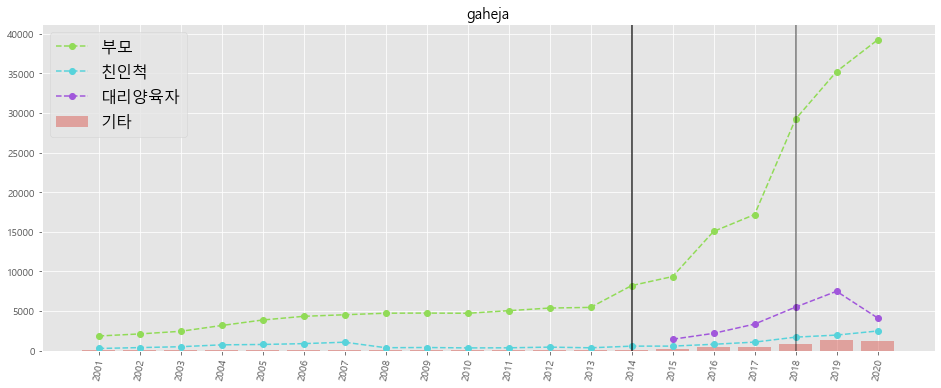

처벌 관련 법 제/개정


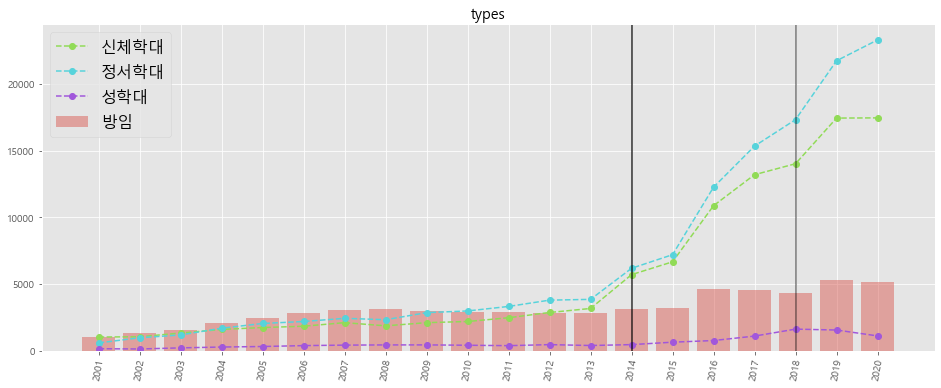

신고 관련 법 제/개정


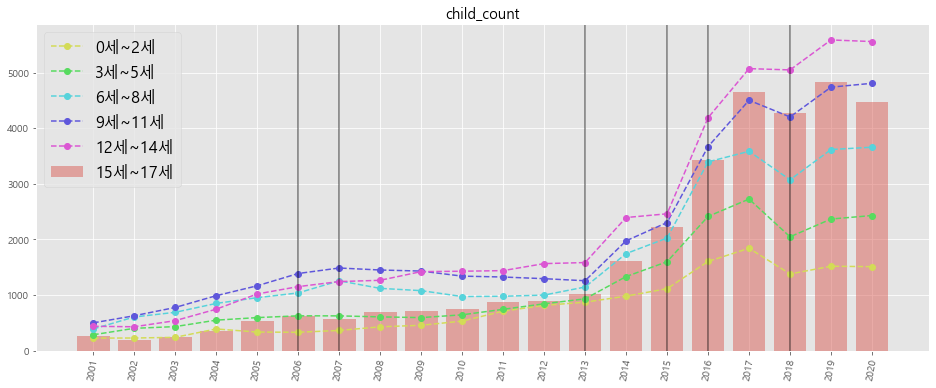

신고 관련 법 제/개정


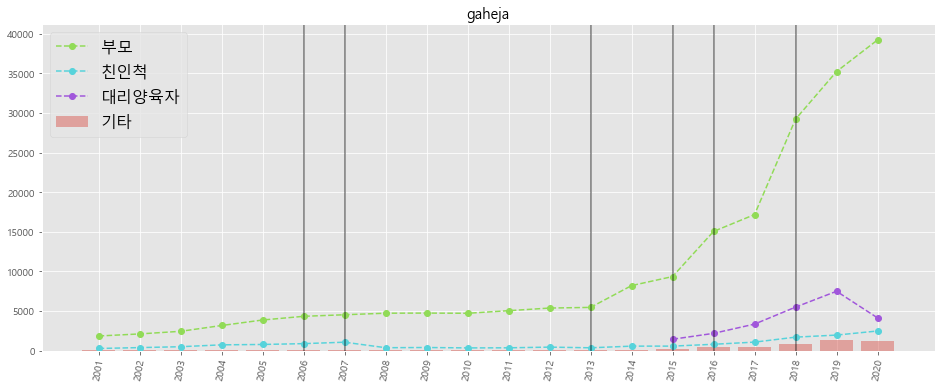

신고 관련 법 제/개정


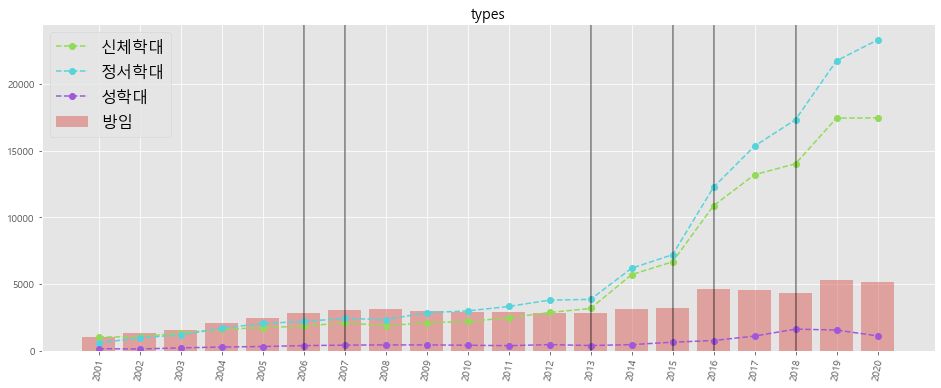

보호 관련 법 제/개정


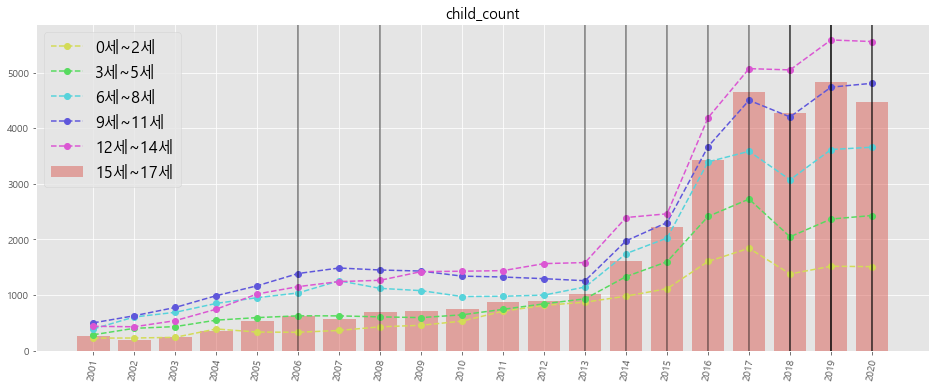

보호 관련 법 제/개정


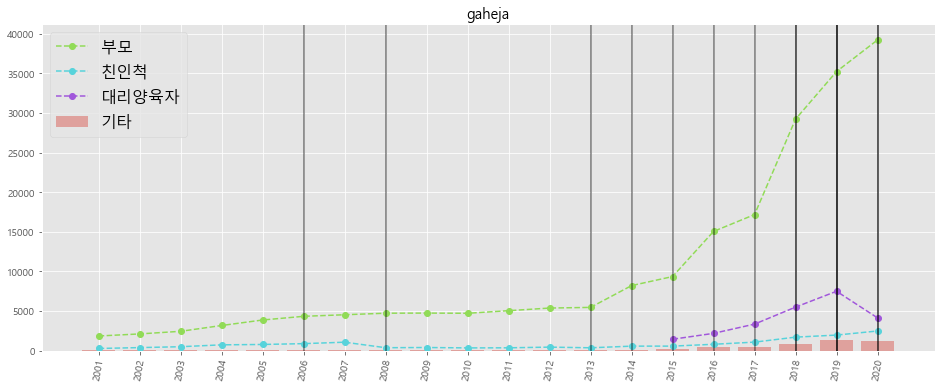

보호 관련 법 제/개정


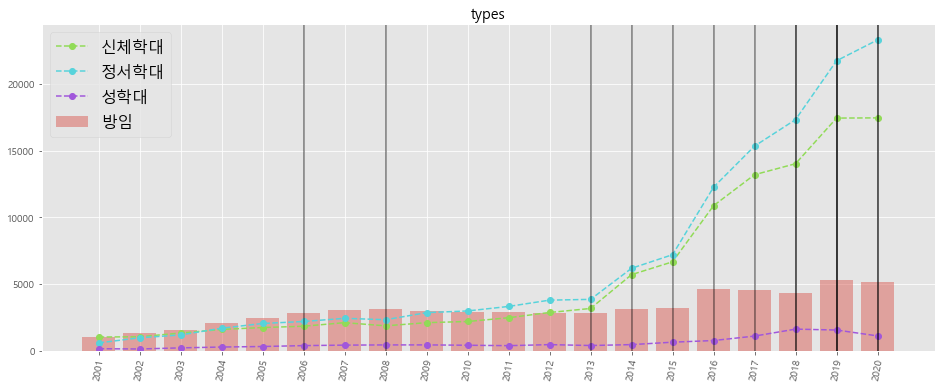

In [198]:
conn = pymysql.connect(host = 'localhost', user = 'root', password = 'pokespe123!', 
                      db = 'child_abuse_db', charset = 'utf8')
cur = conn.cursor()

cur.execute('show tables;')
table_names = [t[0] for t in cur.fetchall()]
print('table in DataBase :', table_names)

child_abuse_datas = ['child_count', 'gaheja', 'types']

for data in child_abuse_datas:
    draw_plot_with_sql(cur, "select * from {};", inputs = [data])


print("12~14세에 대한, 부모에 의한, 정신적 학대가 주를 이룬다.. \n")

law2013_df = get_df_from_db(cur, "select short_dis, detail from {} where 시점 = 2013;", inputs = ['law_history'])
print('2013년 관련 개정 내용 \n', law2013_df['detail'][0])

laws = get_df_from_db(cur, "select * from {};", inputs = ['law_history'])

include_strs = ['처벌', '신고', '보호']
include_strs_df = []
for s in include_strs:
    include_strs_df.append(get_law_detail_include(cur, s))
    
#     print(r_df)
    
powerful_law_df = get_powerful_law(cur)
get_law_wordcloud(raws)
# get_law_wordcloud(powerful_law_df)

for data in child_abuse_datas:
    draw_plot_with_sql(cur, "select * from {};", [data], powerful_law_df)
print('''법률 초기 제정, 전문 개정 영향
:  아동학대 처벌법 제정, 개정 이후 아동학대 발생 수와 피해 아동 수가 증가한다. 이는 실제 범죄수의 증가로 생각 할 수도 있지만,  
   아동 인권보호에대한 인식 변화와 단속 강화를 통해 기존에 일어나고 있던 범죄행위에 대한 검거수가 높아진 것으로 생각 할 수도 있다.
''')
    
for i in range(len(include_strs)):
    for data in child_abuse_datas:
        print(include_strs[i],'관련 법 제/개정')
        draw_plot_with_sql(cur, "select * from {};", [data], include_strs_df[i], show_text = False)
# protect_df = get_df_from_db(cur, "select short_dis, detail from {} where 시점 >= 2013 and detail like '%보호%';", inputs = ['law_history'])
# print('2013년 이후 보호 관련 개정 내용')
# for i in range(len(protect_df.index)):
#     print(protect_df['detail'][i])
cur.close()
conn.close()

법률 초기 제정, 전문 개정 영향
- 아동학대 처벌법 제정, 개정 이후 아동학대 발생 수와 피해 아동 수가 증가한다. 이는 실제 범죄수의 증가로 생각 할 수도 있지만,  
아동 인권보호에대한 인식 변화와 단속 강화를 통해 기존에 일어나고 있던 범죄행위에 대한 검거수가 높아진 것으로 생각 할 수도 있다.

가해자 처벌 법률 개정 영향
- 아동학대 발생 증가 추세에 따라 처벌을 강화하는 법률을 개정하였지만 그 효과는 부족한 것으로 보인다.
- 유사하던 정서적, 신체적 학대 건수가 14년 개정이후 정서적 학대가 더 많이 발생하는 경향을 보이기도 한다.

신고자 관련 법률 개정 영향
- 2016, 2017년 관련 법을 정하여 신고자의 의무를 강화하고 신고를 유도하였지만 효과는 미비하였다. 이후 2013년 cctv의 사용관련 법 개정으로 아동학대 검거 건수가 증가하였다.

피해자 보호 법률 개정 영향
- 2013년 이후로 압도적으로 증가한 발생 건수에 맞추어 피해자 보호 법률을 매년 개정하였다.  
- 보호종료 이후까지 이어지는 전 과정을 총괄적, 체계적으로 지원 하기위한 개선을 이어나가고 있다.



In [180]:
raws

,ind,시점,set_date,short_dis,detail
0,1,2000,2000-07-13,아동복지법 전문개정,우리 사회의 아동복지수요에 능동적으로 대응하고 최근 심각한 사회문제로 지적된 바 있...
1,2,2004,2004-07-30,아동복지법 일부개정,아동의 권리증진과 건강한 출생 및 성장을 위해 종합적인 아동정책을 수립하고 관계부처...
2,3,2006,2006-01-14,아동복지법 일부개정,보호를 필요로 하는 아동에 대한 가정위탁보호를 활성화할 수 있도록 가정위탁지원센터 ...
3,4,2007,2007-03-28,아동복지법 일부개정,"전문치료기관 또는 요양소에 입원 또는 입소시킬 수 있도록 하고, 아동학대 신고의무자..."
4,5,2008,2008-12-14,아동복지법 일부개정,"실종ㆍ유괴 예방 교육을 실시하고, 아동보호구역에 폐쇄회로 텔레비전을 설치하거나 그 ..."
5,6,2012,2012-08-05,아동복지법 전부개정,"아동종합실태조사를 시행하여 그 결과를 바탕으로 아동정책기본계획을 수립·시행하고, 아..."
6,7,2013,2013-01-23,아동복지법 일부개정,아동보호구역에 영상정보처리기기(CCTV)를 설치할 수 있도록 재량사항으로 규정하고 ...
7,8,2014,2014-09-29,아동복지법 일부개정,"아동학대범죄의 처벌 등에 관한 특례법」에 따라 관련 조문을 정비하고, 아동학대 관련..."
8,9,2015,2015-09-28,아동복지법 일부개정,피해아동의 가족 구성원 파악을 통한 사후조치를 실효성 있게 하도록 아동보호전문기관의...
9,10,2016,2016-06-30,아동복지법 일부개정,아동에 대해 감염병 예방 등 보건위생관리에 관한 교육을 실시하여 감염을 스스로 방지...


### 2조 구해조 최종결론

- 결과적으로 보호아동을 위한 쉼터의 수 증가와 재학대 방지 대책, 신고자 보호장치가 더욱 필요할 것으로 고려되며 대부분의 범죄가 가정에서, 부모에 의한 정신적 학대이므로 이를 방지하기 위해 아동학대 가해자 상담 혹은 치료시설 확충 방안 또한 중요할 것이다.

